In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pickle
import gzip
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
#获取fashion数据集并对数据集进行reshape操作
def load_data():
    dataset_path=Path('G:/jupyter/MNIST')
    fashion_path=dataset_path/'fashion.pkl.gz'
    f = gzip.open(fashion_path, 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding="latin1")
    #解压后的文件夹有训练集，验证集，测试集三部分
    f.close()
    return (training_data, validation_data, test_data)


In [3]:
(train_images,train_labels),(vallid_images,valid_labels),(test_images,test_labels)=load_data()
print(train_images.shape)
# print(train_images[1])
print(train_labels[1])

(50000, 28, 28)
0


label  = 9


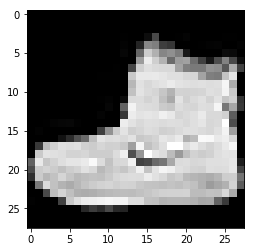

In [4]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0].reshape(28,28),cmap = 'gray')
print('label  = {}'.format(train_labels[0]))
plt.show()

In [5]:
train_images=train_images/255
test_images=test_images/255

In [12]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                       keras.layers.Dense(128,activation='relu'),
                       keras.layers.Dense(10,activation='softmax')
                        ])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(train_images,train_labels,epochs=70)

Train on 50000 samples
Epoch 1/70
50000/50000 [==============================] - 4s 87us/sample - loss: 0.3789 - accuracy: 0.8661
Epoch 2/70
50000/50000 [==============================] - 4s 79us/sample - loss: 0.3760 - accuracy: 0.8669
Epoch 3/70
50000/50000 [==============================] - 4s 86us/sample - loss: 0.3722 - accuracy: 0.8686
Epoch 4/70
50000/50000 [==============================] - 5s 108us/sample - loss: 0.3697 - accuracy: 0.8684
Epoch 5/70
50000/50000 [==============================] - 6s 128us/sample - loss: 0.3664 - accuracy: 0.8710
Epoch 6/70
50000/50000 [==============================] - 5s 93us/sample - loss: 0.3633 - accuracy: 0.8714
Epoch 7/70
50000/50000 [==============================] - 4s 90us/sample - loss: 0.3608 - accuracy: 0.8724
Epoch 8/70
50000/50000 [==============================] - 5s 105us/sample - loss: 0.3582 - accuracy: 0.8735
Epoch 9/70
50000/50000 [==============================] - 5s 97us/sample - loss: 0.3556 - accuracy: 0.8746
Epoch 10/70

In [18]:
predictions = model.predict(test_images)#对所有标签与图片进行预测
predictions

array([[5.2973133e-09, 4.2902565e-12, 1.4835687e-06, ..., 1.2168501e-02,
        4.0567893e-04, 9.5955461e-01],
       [2.4382847e-05, 1.6125393e-09, 9.9023753e-01, ..., 2.0354687e-20,
        8.2229162e-06, 8.8981703e-22],
       [8.3440566e-05, 9.9989176e-01, 3.9029542e-06, ..., 3.1171365e-13,
        1.2270664e-08, 9.0990185e-15],
       ...,
       [1.8914409e-03, 1.4891606e-09, 2.3631810e-03, ..., 9.7530899e-09,
        9.8488045e-01, 1.5457612e-09],
       [3.4202337e-06, 9.9948174e-01, 1.6164825e-06, ..., 5.6505750e-10,
        8.1641964e-08, 4.4599933e-09],
       [5.3370326e-07, 5.2523735e-08, 3.1992422e-05, ..., 7.9032183e-03,
        6.8539154e-04, 4.8856623e-06]], dtype=float32)

In [19]:
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.2429 - accuracy: 0.8699

Test accuracy: 0.8699


In [22]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [23]:
def plot_image(i,predictions_array,true_label,img):
    predictions_array,true_label,img = predictions_array,true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img,cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
 
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

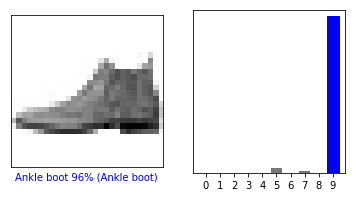

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

In [25]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()